In [2]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 10: Hilbert transforms

1. Hilbert transform on the interval
    - Plemelj theorem for additive jump
2. Real / imaginary parts of the Cauchy transform

The Hilbert transform is fundamental to the study of singular integrals, and is of particular use in Signal processing. We introduce it via its links to the Cauchy transform.

## Hilbert transform on the interval

We now investigate the additive jump that the Cauchy transform satisfies. That is, we know
$$
    \CC^+ f(x) - \CC^- f(x) = f(x)
$$
but what about 
$$
    \CC^+ f(x) + \CC^- f(x)?
$$
The answer is given in terms of a principal value integral, but now the integral is on a finite domain with a singularity at a prescribed point $x$ (normally a pole):

**Definition (Principal value integral on an interval)** 
The (Cauchy) principal value integral at $a < x < b$ is defined as
$$
\dashint_a^b f(t) \dt := \lim_{\epsilon \rightarrow 0} \left(\int_a^{x - \epsilon} + \int_{x + \epsilon}^b \right) f(t) \dt
$$
Typically, the singular point $x$ is obvious from the integrand.

_Examples_:

1. Here, the singular point is implicitly 0:
$$\dashint_{-1}^1  {1 \over x} \dx = 0$$
3. Here, the singular point is implicitly 0:
$$\dashint_0^1  {1 \over x} \dx = \hbox{undefined}$$
2. Here, the singular point is also implicitly 0
$$\dashint_{-1}^1  \cot x \dx = 0$$
2. Here, the singular point is implicitly $x$:
$$\dashint_{-1}^1  {1 \over t - x} \D t = \log(1+x) - \log(1-x)$$
5. Here the singular point is also implicitly $x$:
$$\dashint_{-1}^1  \cot(t-x) \dt = 0$$

Here is a plot of the integration domain, showing how it avoids the singularity:

log(1 - x) - log(1 + x) = -0.20067069546215122


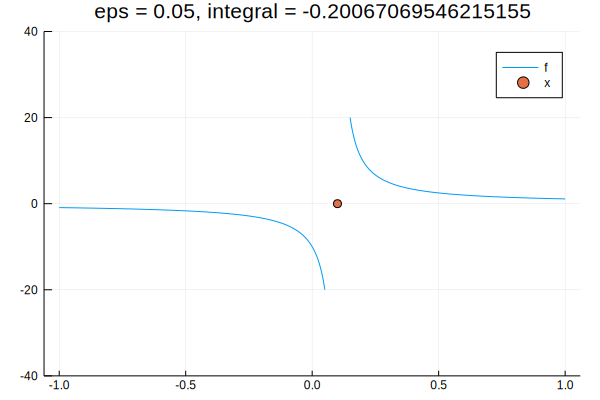

In [5]:
ε = 0.05
x = 0.1
Γ = Segment(-1 , x-ε) ∪ Segment(x+ε , 1)
t = Fun(Γ)
f = Fun(1/(t - x))

@show log(1 - x) - log(1+x)

plot(f; label="f", title="eps = $(ε), integral = $(sum(f))",ylims=(-40,40))
scatter!([x],[0.0];label="x")

Using the principal value integral, we can define a singular integral operator called the _Hilbert transform_:

**Definition (Hilbert transform)** For $a < x < b$, define
$$
\HH_{[a,b]} f(x) =  {1 \over \pi} \dashint_a^b {f(t) \over {t - x}} \D t
$$

Here's a plot of some simple hilbert transforms:

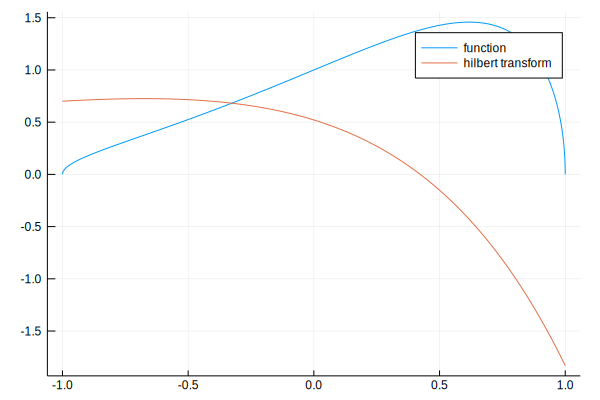

In [7]:
x = Fun(-1 .. 1)
f = exp(x)*sqrt(1-x^2)
plot(f; label="function")
plot!(hilbert(f); label="hilbert transform")

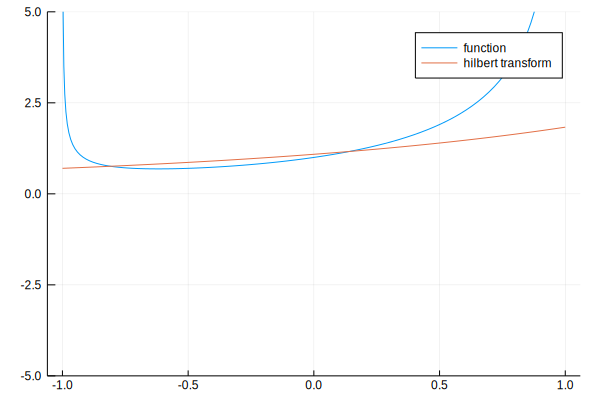

In [8]:
x = Fun(-1 .. 1)
f = exp(x)/sqrt(1-x^2)
plot(f; label="function", ylims=(-5,5))
plot!(hilbert(f); label="hilbert transform")

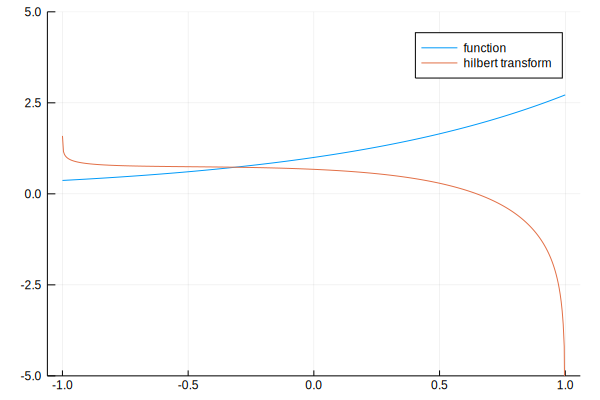

In [10]:
f = exp(x)
xx = range(-0.9999; stop=0.9999, length=500)
plot(f; ylims=(-5,5), label="function")
plot!(xx, hilbert.(f, xx); label="hilbert transform")

## Plemelj theorem for additive jump

A key result is that the additive jump of the Cauchy transform is given by the Hilbert transform:

**Theorem (Plemelj on the interval III)** 
The Cauchy transform has the additive jump
$$
\CC_{[a,b]}^+ f(x) + \CC_{[a,b]}^- f(x) = - \I \HH f(x)
$$


**Sketch of Proof** We first show the result for $f(x) = 1$. Note that by deformation through half circles of radius $r$ near $x$ we have (using the notation from last lecture)
\begin{align*}
\CC_{[a,b]}^+ 1(x) + \CC_{[a,b]}^- 1(x) &= {1 \over 2 \pi\I} \left[\int_{\gamma_x^+} + \int_{\gamma_x^-} \right] {\D \zeta \over \zeta -x}  \\
        & = {2 \over 2 \pi \I} \left[ \int_a^{x-\epsilon} + \int_{x+\epsilon}^b \right] {\dt \over t - x} \cr
        & \qquad + {1 \over 2 \pi \I} \left[ \int_{\{x + \epsilon e^{\I \theta} : \pi \geq \theta \geq 0 \}} + \int_{\{x + \epsilon e^{\I \theta} : -\pi \leq \theta \leq 0 \}} \right] {\D\zeta \over \zeta - x} \\
&= {1 \over 2 \pi \I} \left[ \int_a^{x-\epsilon} + \int_{x+\epsilon}^b \right] {\dt \over t - x} 
\end{align*}
This holds true for all $\epsilon$, including $\epsilon \rightarrow 0$, hence
$$
\CC_{[a,b]}^+ 1(x) + \CC_{[a,b]}^- 1(x) = {1 \over \pi \I} \dashint_a^b {\dt \over t -x} = -\I \HH 1(x)
$$
For general $f$, we subtract and add back in like last lecture:
$$
\CC_{[a,b]}^\pm f(x) = {1 \over 2 \pi \I} \int_a^b {f(t) - f(x) \over t-x} \dt + f(x) \CC^\pm 1(x)
$$
therefore
\begin{align*}
\CC_{[a,b]}^+ f(x) + \CC_{[a,b]}^- f(x) &= {1 \over \pi \I} \int_a^b {f(t) - f(x) \over t-x} \dt + f(x) (\CC^+ 1(x) + \CC^- 1(x) ) \\
    & = {1 \over \pi \I} \int_a^b {f(t) - f(x) \over t-x} \dt - \I  f(x) \HH 1(x)\\
    & = {1 \over \pi \I} \int_a^b {f(t) - f(x) \over t-x} \dt + {f(x)  \over \pi \I }\dashint_a^b  { 1\over t - x} \dt \\
    & = {1 \over \pi \I} \int_a^b {f(t) \over t-x} \dt = - \I \HH f(x)
\end{align*}
⬛️

Here we test it numerically:

In [7]:
f = exp(x)sqrt(1-x^2)
cauchy(f, 0.1+0.0im)+cauchy(f, 0.1-0.0im) , -im*hilbert(f)(0.1)

(0.0 - 0.4372398225886695im, 0.0 - 0.43723982258866934im)

*Examples*
Recall  (using $\diamond$ for the dummy variable)
$$
{1 \over \sqrt{z-1} \sqrt{z+1}} = -2 \I {\cal C}\left[{1 \over \sqrt{1-\diamond^2}}\right](z)
$$
Therefore:
$$
{\cal H}\left[{1 \over \sqrt{1-\diamond^2}}\right](x) = \I (\CC^+  + \CC^-) \left[{1 \over \sqrt{1-\diamond^2}}\right](x) = {1 \over 2  \sqrt{x-1}_+ \sqrt{x+1}} + {1 \over 2  \sqrt{x-1}_- \sqrt{x+1}} = 0
$$

In [8]:
x = Fun()
norm(hilbert(1/sqrt(1-x^2)))

0.0

Similarly, recall
$$
\sqrt{z-1}\sqrt{z+1} = z  + 2 \I {\cal C}[\sqrt{1-\diamond^2}](z)
$$
Therefore,
$$
{\cal H}\left[{\sqrt{1-\diamond^2}}\right](x) = \I (\CC^+  + \CC^-) \left[{\sqrt{1-\diamond^2}}\right](x) = -x 
$$

In [9]:
plot(hilbert(sqrt(1-x^2)))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -0.75 
 
 
 -0.50 
 
 
 -0.25 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 -0.75 
 
 
 -0.50 
 
 
 -0.25 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1

One more example: since
$$
\CC 1(z) = {\log(z-1) - \log(z+1) \over 2 \pi \I},
$$
we have 
$$
\HH 1(x) = {\log_+(x-1) + \log_-(x-1) - 2\log(x+1) \over 2\pi} = {\log(1-x) - \log(x+1) \over \pi}
$$

In [10]:
hilbert(Fun(1,Legendre()), 0.1), (log(1-0.1)-log(0.1+1))/π

(-0.06387546623297949, -0.06387546623297947)

## Real / imaginary parts of the Cauchy transform

Suppose $f(x)$ is real. Then we have, for example,
$$
\CC f(x) = {1 \over 2 \pi \I} \int_{-1}^1 {f(t) \over t- x} \dt
$$
is strictly imaginary for $x > 1$ and $ x < -1$.  Furthermore, for all $z \in \C \backslash [-1,1]$ we have the property that
$$
\overline{\CC f( z)} = \overline{{1 \over 2 \pi \I} \int_{-1}^1 {f(x) \over x - z} \dx} = -{1 \over 2 \pi \I} \int_{-1}^1 {f(x) \over x - \bar z} \dx = - \CC f(\bar z)
$$

In [11]:
f = exp(x)sqrt(1-x^2)
cauchy(f, 10.0+im), cauchy(f, 10.0-im)

(0.0029553295890040973 + 0.02871472499617892im, -0.0029553295890040973 + 0.02871472499617892im)

It follows that
$$
\overline{\CC^+} f(x) = - \CC^- f(x)
$$
for the whole real line, and in particular we can find the real part of the Cauchy transform via: 
$$
f(x) = \CC^+ f(x) - \CC^- f(x) = \CC^+ f(x) + \overline{\CC^+ f(x)} = 2 \Re \CC^+ f(x)
$$

In [12]:
f(0.1), 2real(cauchy(f, 0.1+0.0im)), -2real(cauchy(f, 0.1-0.0im))

(1.0996311793408589, 1.0996311793408586, 1.0996311793408586)

Similarly, we can find the imaginary part via:

$$
 {}- {\cal H} f(x) = -\I(\CC^+ f(x) + \CC^- f(x)) = -\I(\CC^+ f(x) - \overline{\CC^+ f(x)}) = 2 \Im \CC^+ f(x) = 2 \Im \CC^- f(x)
$$

In [13]:
-hilbert(f, 0.1), 2imag(cauchy(f, 0.1+0.0im)), 2imag(cauchy(f, 0.1-0.0im))

(-0.43723982258866934, -0.4372398225886695, -0.4372398225886695)